In [21]:
import pickle
with open('var1.pkl', 'rb') as f1:
    eva_model = pickle.load(f1)
with open('var2.pkl', 'rb') as f2:
    eva_model_pca = pickle.load(f2)
print(eva_model)
print(eva_model_pca)

[0.2638762771470863, 0.2637978557379003, 0.1948493552690919, 0.1944111205918628, 7.53603416597286, 7.533794531454142, 5.564696510051072, 5.552180979909377]
[0.447588443810088, 0.44960587462388485, 0.33564572049632435, 0.3375133957220034, 12.782664062549633, 12.840279804686942, 9.585695404945223, 9.639034282027428]


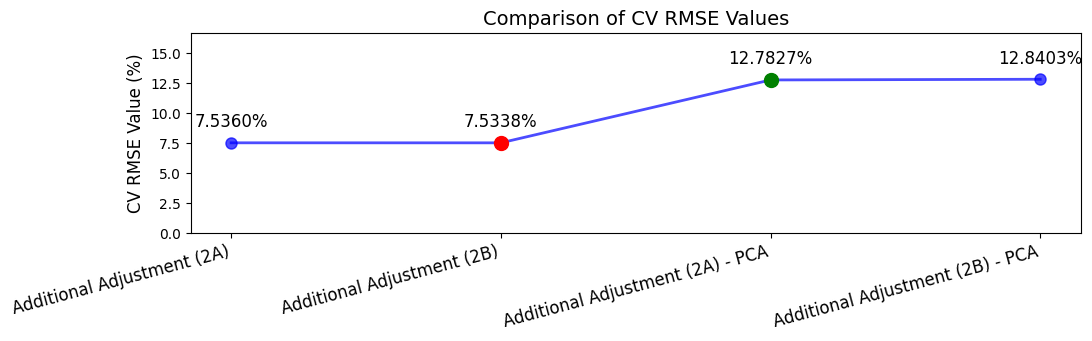

In [60]:
import matplotlib.pyplot as plt
# RMSE
CVrmse_values = [eva_model[4], eva_model[5], eva_model_pca[4], eva_model_pca[5]]

labels = [
    "Additional Adjustment (2A)",
    "Additional Adjustment (2B)",
    "Additional Adjustment (2A) - PCA",
    "Additional Adjustment (2B) - PCA",
]

# minimum RMSE pour chaque partie
min_CVrmse_index_eva_model_6 = CVrmse_values[:2].index(min(CVrmse_values[:2]))  # Pour eva_model[6] et eva_model[7]
min_CVrmse_index_eva_model_pca_6 = CVrmse_values[2:].index(min(CVrmse_values[2:])) + 2  # Pour eva_model_pca[6] et eva_model_pca[7]

#  la figure et des axes
fig, ax = plt.subplots(figsize=(10, 5))

#  RMSE avec une courbe 
ax.plot(labels, CVrmse_values, marker='o', color='blue', alpha=0.7, linestyle='-', linewidth=2, markersize=8)

# Changer la couleur du point avec la valeur minimale
ax.plot(labels[min_CVrmse_index_eva_model_6], CVrmse_values[min_CVrmse_index_eva_model_6], marker='o', color='red', markersize=10)
ax.plot(labels[min_CVrmse_index_eva_model_pca_6], CVrmse_values[min_CVrmse_index_eva_model_pca_6], marker='o', color='green', markersize=10)

for i, z in enumerate(CVrmse_values):
    ax.text(i, CVrmse_values[i] + 1, f"{z:.3f}%", ha='center', fontsize=14, va='bottom')

# Définir manuellement les positions des ticks
ax.set_xticks(range(len(labels)))  
ax.set_xticklabels(labels, rotation=15, ha="right", fontsize=12)

ax.set_ylim(0, max(CVrmse_values) * 1.3)  


ax.set_title("Comparison of CV RMSE Values",fontsize= 14)
ax.set_ylabel("CV RMSE Value (%)",fontsize= 12)


plt.subplots_adjust(left=0.01, right=0.9, bottom=0.5, top=0.9)
plt.savefig("Image/CV_RMSE_lineplot.png", dpi=300, bbox_inches='tight')
plt.show()

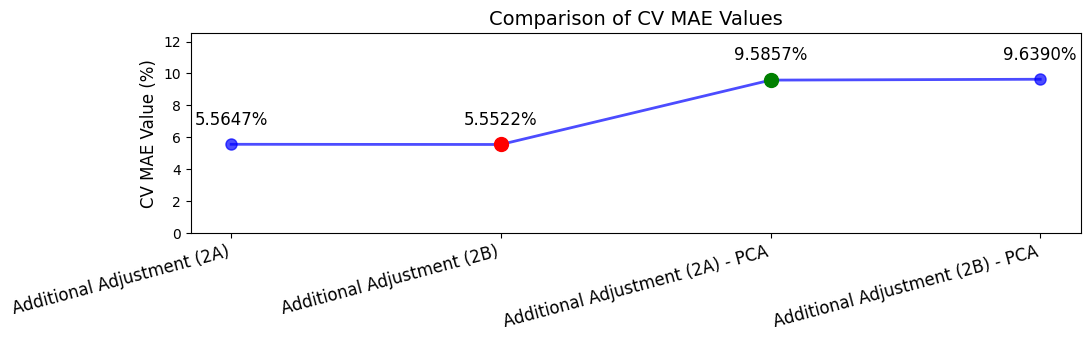

In [61]:
CVmae_values = [eva_model[6], eva_model[7], eva_model_pca[6], eva_model_pca[7]]

labels = [
    "Additional Adjustment (2A)",
    "Additional Adjustment (2B)",
    "Additional Adjustment (2A) - PCA",
    "Additional Adjustment (2B) - PCA",
]

#  minimum MAE dans chaque groupe
min_CVmae_index_eva_model_8 = CVmae_values[:2].index(min(CVmae_values[:2])) 
min_CVmae_index_eva_model_pca_8 = CVmae_values[2:].index(min(CVmae_values[2:])) + 2  


fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(labels, CVmae_values, marker='o', color='blue', alpha=0.7, linestyle='-', linewidth=2, markersize=8)

ax.plot(labels[min_CVmae_index_eva_model_8], CVmae_values[min_CVmae_index_eva_model_8], marker='o', color='red', markersize=10)
ax.plot(labels[min_CVmae_index_eva_model_pca_8], CVmae_values[min_CVmae_index_eva_model_pca_8], marker='o', color='green', markersize=10)


for i, z in enumerate(CVmae_values):
    ax.text(i, CVmae_values[i] + 1, f"{z:.3f}%", ha='center', fontsize=14, va='bottom')  # Đẩy văn bản lên trên một chút

ax.set_xticks(range(len(labels)))  
ax.set_xticklabels(labels, rotation=15, ha="right", fontsize=12)


ax.set_ylim(0, max(CVmae_values) * 1.3)

# Titre et labels
ax.set_title("Comparison of CV MAE Values",fontsize= 14)
ax.set_ylabel("CV MAE Value (%)",fontsize= 12)

# Ajuster la mise en page
plt.subplots_adjust(left=0.01, right=0.9, bottom=0.5, top=0.9)
plt.savefig("Image/CV_MAE_lineplot.png", dpi=300, bbox_inches='tight')
plt.show()